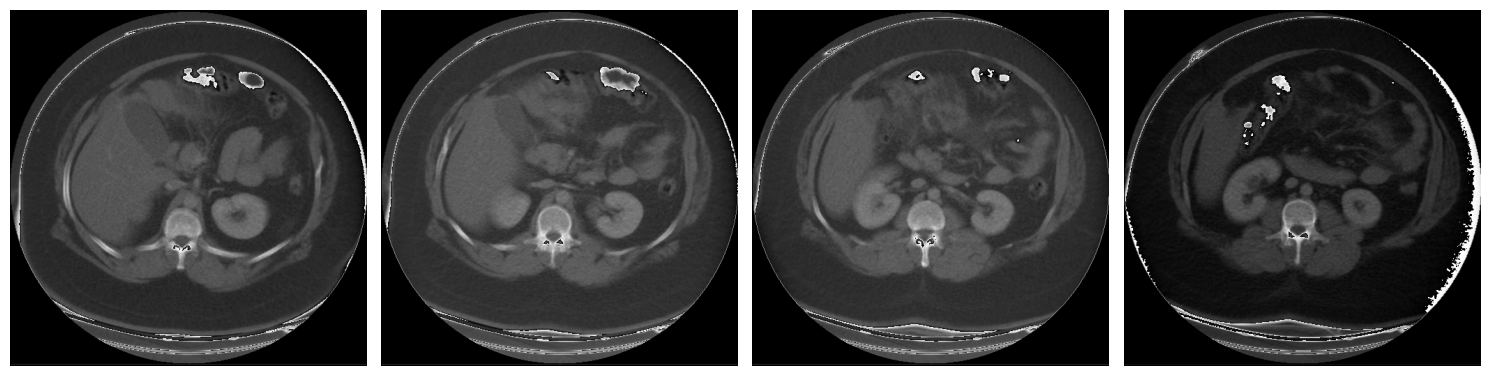

In [26]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms

path = '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/Kaggle/ab_trauma/train_images/33/55570/'

# Get the list of files in the directory
files = os.listdir(path)

# sort the files
files.sort()

# read in the png files
images = [cv2.imread(path + file) for file in files]

# Define transformations
to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

# Create a grid to display images
fig, axs = plt.subplots(1, 4, figsize=(15, 15))

# Add the images together in groups of 4
for idx, i in enumerate(range(0, 24, 6)):
    # Get the subset of images
    subset = images[i:i+6]

    
    # Convert subset images to tensors and sum them
    summed_tensor = sum([to_tensor(img) for img in subset])
    
    # Convert summed tensor to PIL Image and clip values to [0, 254]
    summed_image = to_pil(summed_tensor)
    
    # Display the summed image
    axs[idx].imshow(summed_image)
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

In [119]:
from torchvision import transforms
import PIL

# Define transformations and augmentations
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomVerticalFlip(),
    # transforms.RandomAutocontrast(p=1),
    # transforms.RandomRotation(5),
    # transforms.Pad(padding = 20),
    # transforms.ColorJitter(),
    transforms.RandomPerspective(),
    # transforms.RandomAffine(degrees=(5, 10), translate=(0.05, 0.1), scale=(0.8, 0.95)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.186, 0.186, 0.186], std=[0.1453, 0.1453, 0.1453])
])

# Apply transformations to the images
new = [transform(PIL.Image.fromarray(image)) for image in images]

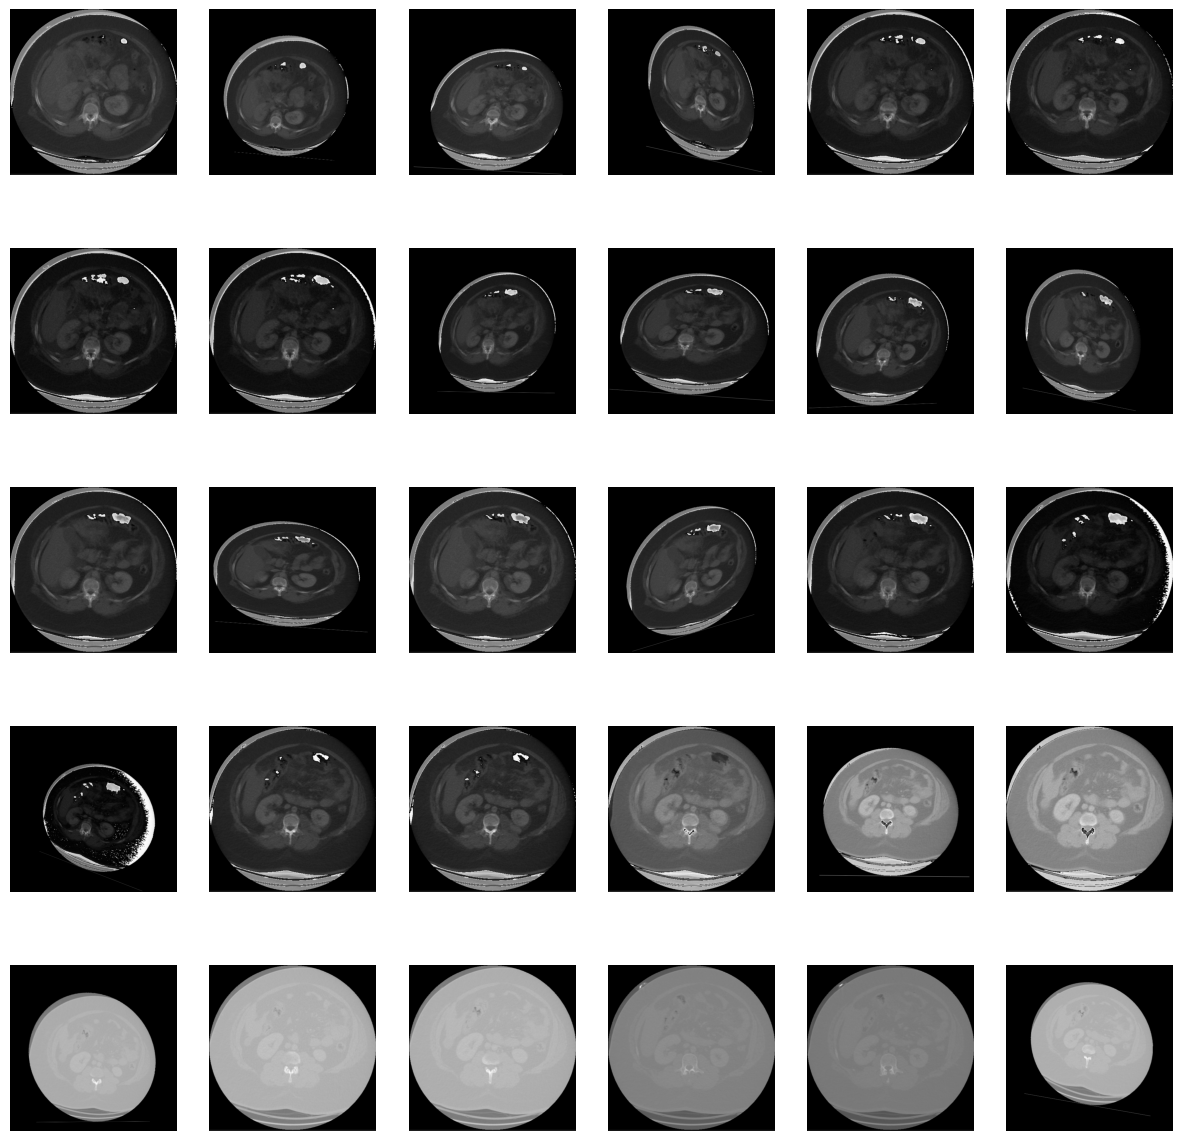

In [120]:
import matplotlib.pyplot as plt

# Assuming new is a list of 30 images
fig, axs = plt.subplots(5, 6, figsize=(15, 15))
for i in range(5):
    for j in range(6):
        idx = i * 6 + j  # Calculate the index in the image list
        axs[i, j].imshow(new[idx].permute(1, 2, 0))
        axs[i, j].axis('off')  # Optional:


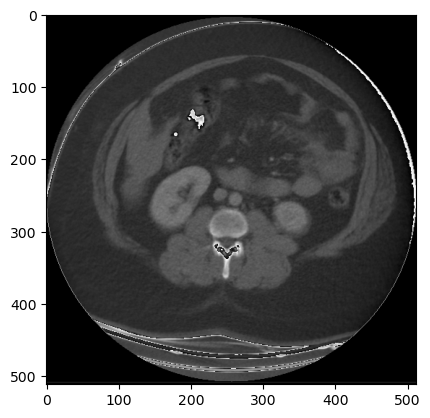

In [99]:
plt.imshow(new[22].permute(1, 2, 0))

In [101]:
new[22].std()

tensor(0.1453)

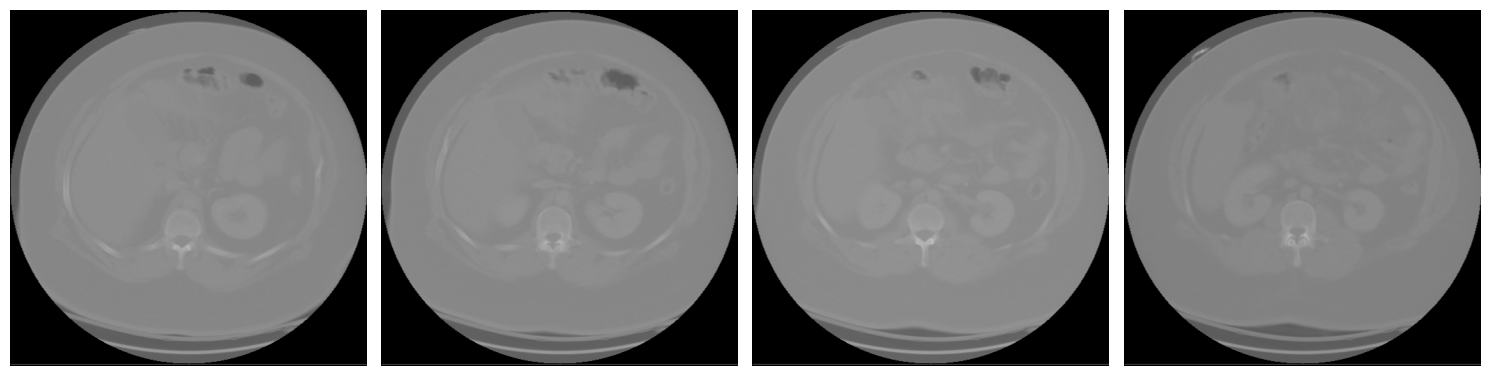

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms

path = '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/Kaggle/ab_trauma/train_images/33/55570/'

# Get the list of files in the directory
files = os.listdir(path)

# sort the files
files.sort()

# read in the png files
images = [cv2.imread(path + file) for file in files]

# Define transformations
to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

# Create a grid to display images
fig, axs = plt.subplots(1, 4, figsize=(15, 15))

# Stack the images together in groups of 5 as channels
for idx, i in enumerate(range(0, 20, 5)):  # Adjusted the loop for groups of 5
    # Get the subset of images
    subset = images[i:i+5]

    # Convert subset images to tensors and stack them
    stacked_tensor = torch.stack([to_tensor(img) for img in subset])
    
    # For visualization purposes, you might want to average across channels to create a single image
    averaged_tensor = torch.mean(stacked_tensor, dim=0)
    
    # Convert averaged tensor to PIL Image
    averaged_image = to_pil(averaged_tensor)
    
    # Display the averaged image
    axs[idx].imshow(averaged_image)
    axs[idx].axis('off')

plt.tight_layout()
plt.show()
